In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Flighttraindataset.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
5h 15m      62
11h         62
11h 45m     62
          ... 
33h 20m      1
29h 30m      1
4h 10m       1
5m           1
35h 20m      1
41h 20m      1
28h 30m      1
29h 40m      1
32h 20m      1
3h 25m       1
29h 10m      1
42h 45m      1
33h 45m      1
32h 55m      1
30h 10m      1
13h 35m      1
47h          1
36h 25m      1
27h 55m      1
37h 10m      1
30h 15m      1
31h 30m      1
31h 50m      1
47h 40m      1
27h 30m      1
30h 25m      1
35h 35m      1
19h 50m      1
42h 5m       1
40h 20m      1
Name: Duration, Length: 368, dtype: int64

# Exploratory Data Analysis

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [8]:
df['Journey_Date'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [9]:
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop('Date_of_Journey', axis = 1, inplace = True)

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
#### Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

#Extracting Hours
df['Time_in_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour

#Extracting Minutes
df['Time_in_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

#Now we can drop Arrival_time Feature as we had extracted required data from it and created new features.
df.drop('Arrival_Time', axis = 1, inplace = True)

In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Time_in_hr,Time_in_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


In [15]:
#### Departure time is when the plane pulls up to the gate.
# Similar to Arrival_Time we can extract values from Departure_Time

#Extracting Hours
df['Dep_Time_in_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour

#Extracting Minutes
df['Dep_Time_in_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

#Now we can drop Dep_Time Feature as we had extracted required data from it and created new features.
df.drop('Dep_Time', axis = 1, inplace = True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Time_in_hr,Time_in_min,Dep_Time_in_hr,Dep_Time_in_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [17]:
'2h 50m'.split()

['2h', '50m']

In [18]:
len('2h 50m'.split())

2

In [19]:
'2h'.strip()+'0m'

'2h0m'

In [20]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [21]:
df['Dur_in_hr'] = duration_hours

In [22]:
df['Dur_in_min'] = duration_mins

In [23]:
df.drop('Duration', axis = 1, inplace = True)

In [24]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Time_in_hr,Time_in_min,Dep_Time_in_hr,Dep_Time_in_min,Dur_in_hr,Dur_in_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


# Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case 

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [25]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [26]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [27]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [28]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

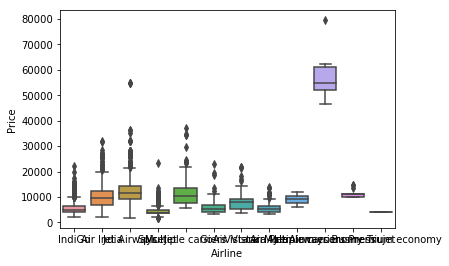

In [29]:
sns.boxplot(df['Airline'], df['Price'])

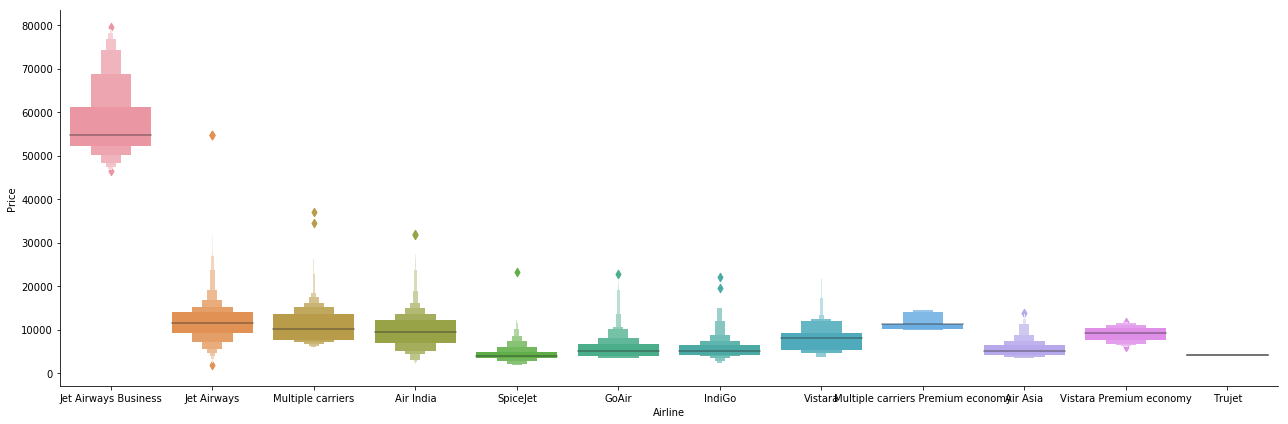

In [30]:
## We can use boxplot or catplot.

# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [31]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline)

Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


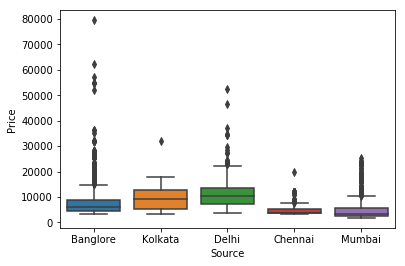

In [32]:
sns.boxplot(df['Source'],df['Price'], width = 0.8)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

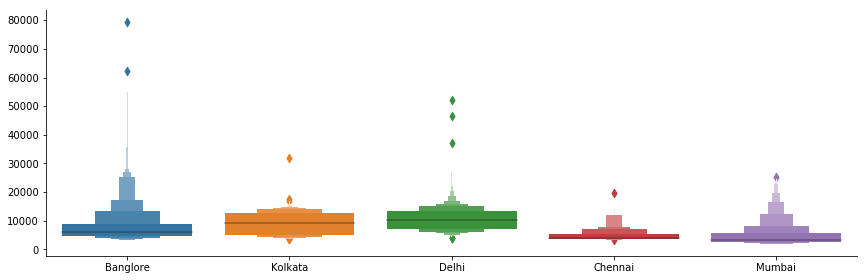

In [33]:
## We can also see the plot by Catplot

sns.catplot(y=df['Price'], x=df['Source'], data = df.sort_values('Price',ascending = False), height = 4, kind='boxen', aspect=3)
plt.show()

In [34]:
## For source feature also performing one hot encoding

Source = df[['Source']]

Source = pd.get_dummies(Source)

Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


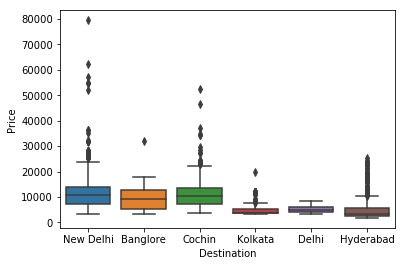

In [35]:
sns.boxplot(df['Destination'],df['Price'])

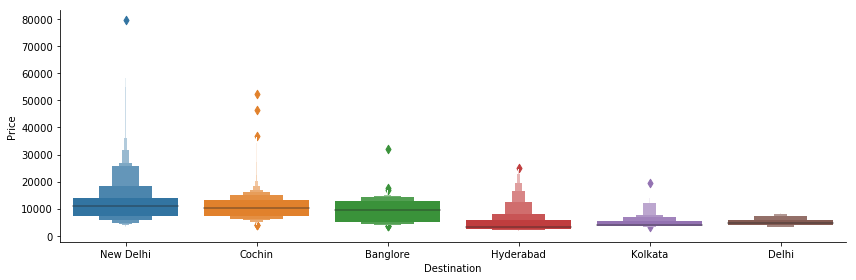

In [36]:
## We can also perform catplot plotting

sns.catplot(x='Destination', y='Price', data=df.sort_values('Price',ascending = False), height = 4, kind = 'boxen', aspect = 3)
plt.show()

In [37]:
Destination = df[['Destination']]

Destination = pd.get_dummies(Destination)

Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [38]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(['Additional_Info','Route'], axis = 1, inplace = True)

df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Time_in_hr,Time_in_min,Dep_Time_in_hr,Dep_Time_in_min,Dur_in_hr,Dur_in_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,21,35,16,50,4,45


In [39]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop" : 0,"1 stop" : 1,"2 stops" : 2,"3 stops" : 3,"4 stops" : 4}, inplace = True)

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Time_in_hr,Time_in_min,Dep_Time_in_hr,Dep_Time_in_min,Dur_in_hr,Dur_in_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45


In [42]:
Final_data = pd.concat([df,Airline,Source,Destination], axis = 1)
Final_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Time_in_hr,Time_in_min,Dep_Time_in_hr,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,0,0,0,0,0,0,0,0,0,1


In [43]:
## As We had added the features of Airline, Source, Destination which are one hot encoded, Now we can drop the main features of those 

Final_data.drop(['Airline','Source','Destination'], axis = 1, inplace = True)

Final_data.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Time_in_hr,Time_in_min,Dep_Time_in_hr,Dep_Time_in_min,Dur_in_hr,Dur_in_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


The above output is our final data frame which has got cleared from feature engineering part. And we can also see all our values of features are in Integer part. So no issue to feed the data to model. 

#  Same Process can perform to our TEST DATA

In [44]:
df2 = pd.read_excel('Flighttestdata.xlsx')
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

From above output as there were no null values so no need to do the step of droping null values.

In [46]:
df2['DepTime_in_hr'] = pd.to_datetime(df2['Dep_Time']).dt.hour
df2['DepTime_in_min'] = pd.to_datetime(df2['Dep_Time']).dt.minute
df2.drop('Dep_Time', axis = 1 , inplace = True)

In [47]:
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,DepTime_in_hr,DepTime_in_min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,8,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,23,55


In [48]:
df2['Journey_Date'] = pd.to_datetime(df2['Date_of_Journey'], format = '%d/%m/%Y').dt.day
df2['Journey_Month'] = pd.to_datetime(df2['Date_of_Journey'], format = '%d/%m/%Y').dt.month
df2.drop('Date_of_Journey', axis = 1, inplace = True)

In [49]:
df2.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,DepTime_in_hr,DepTime_in_min,Journey_Date,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,17,30,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,6,20,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,19,15,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,8,0,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,23,55,24,6


In [50]:
df2['Arrivaltime_in_hr'] = pd.to_datetime(df2['Arrival_Time']).dt.hour
df2['Arrivaltime_in_min'] = pd.to_datetime(df2['Arrival_Time']).dt.minute
df2.drop('Arrival_Time', axis = 1, inplace = True)

In [51]:
df2.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,DepTime_in_hr,DepTime_in_min,Journey_Date,Journey_Month,Arrivaltime_in_hr,Arrivaltime_in_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,17,30,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,6,20,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,19,15,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,8,0,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,23,55,24,6,2,45


In [52]:
# Duration
duration = list(df2["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [53]:
df2['Duration_hours'] = duration_hours
df2['Duration_mins'] = duration_mins
df2.drop('Duration', axis = 1, inplace = True)

In [54]:
df2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,DepTime_in_hr,DepTime_in_min,Journey_Date,Journey_Month,Arrivaltime_in_hr,Arrivaltime_in_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,17,30,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,6,20,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,19,15,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8,0,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,23,55,24,6,2,45,2,50


In [55]:
df2.drop(['Route','Additional_Info'], axis = 1, inplace = True)
df2.head()

,Airline,Source,Destination,Total_Stops,DepTime_in_hr,DepTime_in_min,Journey_Date,Journey_Month,Arrivaltime_in_hr,Arrivaltime_in_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,17,30,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,6,20,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,19,15,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,8,0,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,23,55,24,6,2,45,2,50


In [56]:
## Now Handling Categorical features

Airline_test = df2['Airline']

Airline_test = pd.get_dummies(Airline)

Airline_test.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
Source_test = df2['Source']

Source_test = pd.get_dummies(Source)

Source_test.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [58]:
Destination_test = df2['Destination']

Destination_test = pd.get_dummies(Destination)

Destination_test.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [59]:
df2['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
df2.replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4}, inplace =True)

In [61]:
df2.head()

,Airline,Source,Destination,Total_Stops,DepTime_in_hr,DepTime_in_min,Journey_Date,Journey_Month,Arrivaltime_in_hr,Arrivaltime_in_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,17,30,6,6,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,6,20,12,5,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,19,15,21,5,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,8,0,21,5,21,0,13,0
4,Air Asia,Banglore,Delhi,0,23,55,24,6,2,45,2,50


In [62]:
Final_testdata = pd.concat([df2,Airline_test,Source_test,Destination_test], axis = 1)

In [63]:
Final_testdata.head()

,Airline,Source,Destination,Total_Stops,DepTime_in_hr,DepTime_in_min,Journey_Date,Journey_Month,Arrivaltime_in_hr,Arrivaltime_in_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1.0,17.0,30.0,6.0,6.0,4.0,25.0,...,0,0,0,0,0,0,0,0,0,1
1,IndiGo,Kolkata,Banglore,1.0,6.0,20.0,12.0,5.0,10.0,20.0,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,19.0,15.0,21.0,5.0,19.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1.0,8.0,0.0,21.0,5.0,21.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,Air Asia,Banglore,Delhi,0.0,23.0,55.0,24.0,6.0,2.0,45.0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
Final_testdata.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
Final_testdata.head()

,Total_Stops,DepTime_in_hr,DepTime_in_min,Journey_Date,Journey_Month,Arrivaltime_in_hr,Arrivaltime_in_min,Duration_hours,Duration_mins,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,17.0,30.0,6.0,6.0,4.0,25.0,10.0,55.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,6.0,20.0,12.0,5.0,10.0,20.0,4.0,0.0,0,...,0,0,1,0,1,0,0,0,0,0
2,1.0,19.0,15.0,21.0,5.0,19.0,0.0,23.0,45.0,0,...,0,1,0,0,0,1,0,0,0,0
3,1.0,8.0,0.0,21.0,5.0,21.0,0.0,13.0,0.0,0,...,0,0,1,0,1,0,0,0,0,0
4,0.0,23.0,55.0,24.0,6.0,2.0,45.0,2.0,50.0,0,...,0,0,0,0,0,0,0,0,0,1


# Train Data Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**
**feature_importance_**
**SelectKBest**

In [65]:
Final_data.size

352506

In [66]:
Final_data.shape

(10682, 33)

In [67]:
Final_data.columns

Index(['Total_Stops', 'Price', 'Journey_Date', 'Journey_Month', 'Time_in_hr',
       'Time_in_min', 'Dep_Time_in_hr', 'Dep_Time_in_min', 'Dur_in_hr',
       'Dur_in_min', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [68]:
X = Final_data.loc[:,['Total_Stops','Journey_Date','Journey_Month','Dep_Time_in_hr','Dep_Time_in_min','Time_in_hr','Time_in_min',
                  'Dur_in_hr','Dur_in_min','Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Date,Journey_Month,Dep_Time_in_hr,Dep_Time_in_min,Time_in_hr,Time_in_min,Dur_in_hr,Dur_in_min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,...,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
Y = Final_data['Price']
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

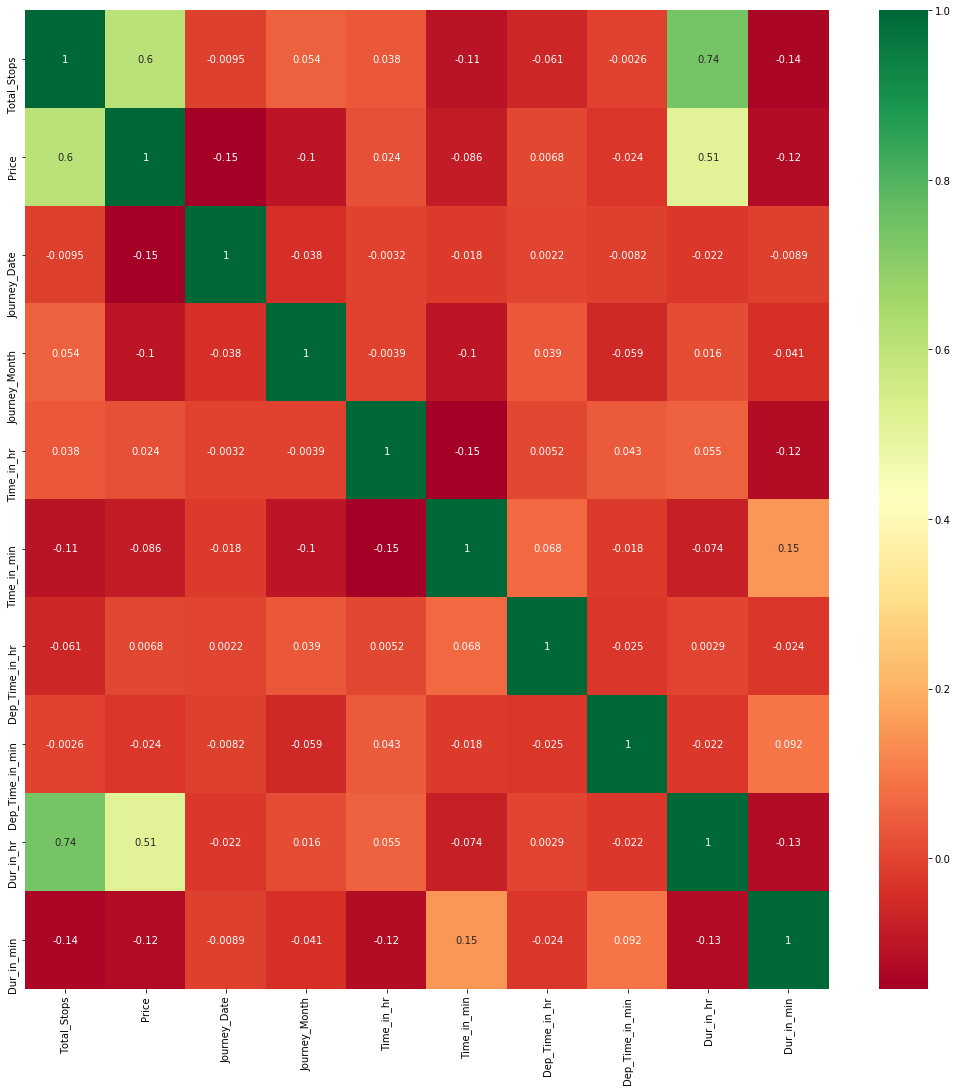

In [70]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),annot = True, cmap = 'RdYlGn')
plt.show()

In [71]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [72]:
print(selection.feature_importances_)

[2.25859862e-01 1.43859432e-01 5.24009875e-02 2.38965597e-02
 2.09588229e-02 2.77598703e-02 1.93565026e-02 1.40706670e-01
 1.75622439e-02 2.35594074e-03 9.06455742e-03 1.87194874e-03
 1.89773420e-02 1.28977286e-01 6.72606215e-02 1.67676643e-02
 7.99748911e-04 3.36183349e-03 1.11801714e-04 4.83348422e-03
 8.44310336e-05 7.85864825e-03 4.55869174e-04 9.57700983e-03
 1.93361557e-03 7.68818642e-03 1.99178403e-03 8.08242173e-03
 1.27222909e-02 4.87787664e-03 4.44870545e-04 1.75398161e-02]


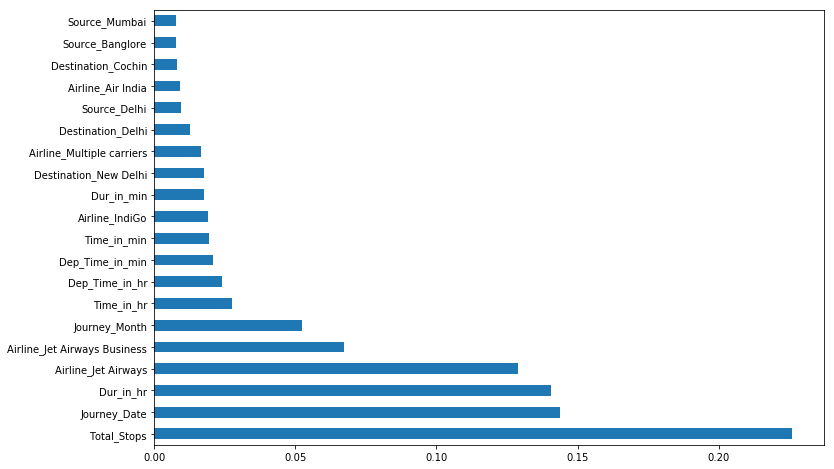

In [73]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest¶

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
3. Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check RSME Score
8. Plot graph

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [75]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)

RandomForestRegressor()

In [76]:
Y_pred = RFR.predict(X_test)

In [77]:
RFR.score(X_train,Y_train)

0.9531974083440692

In [78]:
RFR.score(X_test,Y_test)

0.7955013227104413

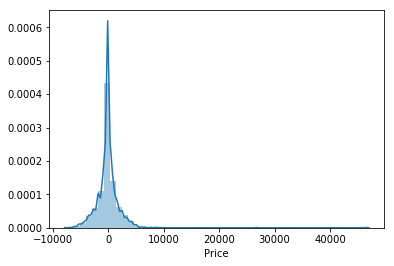

In [79]:
sns.distplot(Y_test-Y_pred)
plt.show()

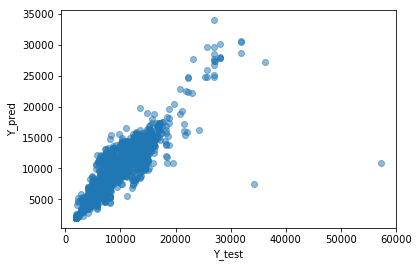

In [80]:
plt.scatter(Y_test,Y_pred, alpha = 0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [81]:
from sklearn import metrics 

In [82]:
print('MAE : ', metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE : ', metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE :  1183.5560152561782
MSE :  4409411.99793405
RMSE :  2099.8599948410965


In [83]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(Y)-min(Y))

0.026887077025966846

In [84]:
metrics.r2_score(Y_test,Y_pred)

0.7955013227104413

# Hyperparameter Tuning

1. Choose following method for hyperparameter tuning
    
    RandomizedSearchCV --> Fast
    
    GridSearchCV
2. Assign hyperparameters in form of dictionery
3. Fit the model
4. Check best paramters and best score

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [87]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [88]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [89]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [91]:

prediction = rf_random.predict(X_test)

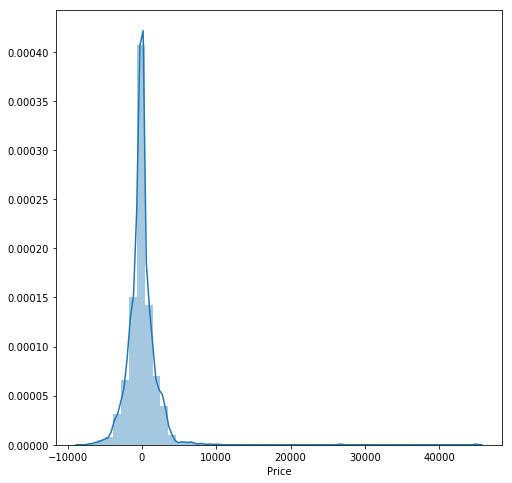

In [93]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

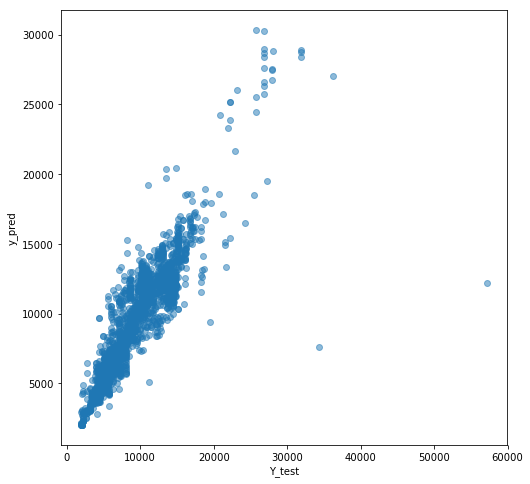

In [94]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("y_pred")
plt.show()

In [96]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1165.7012617995583
MSE: 4055738.1738023413
RMSE: 2013.8863358696144
